# Data Bootcamp Final Project: Musical Trends As Described By Spotify Features

##### Author: Srishti Sanya
##### (srishtisan@nyu.edu)

What kind of music an individual likes can say a lot about them. This is more of an exploration into the kind of music society likes, and what that says about us as a whole. Are we so predictable that our overall taste in music can be explored through graphical analysis? Are there trends in musical preferences that can help decide the next big hits?

This project seeks to explore these questions through the lens of Spotify audio features, classification tools that help them build musical recommendation and predictive technologies. Analyzing these features can give us a wealth of knowledge about the kinds of music that we listen to. 

## Data Report

#### Or, "Building the Franken-Dataset"

A significant portion of the work for this report was made up of the creation of my own dataset of all #1 Billboard songs and their respective spotify features. For the sake of brevity, the code used to create the resulting dataset, "full_features.xlsx", which can be found in this repository, is included in a separate .py file, "dataset.py," also included in this repository. 

The dataset itself is a combination of two major sources of information- the Spotify Web API and the series of Wikipedia articles titled "List of Billboard Hot 100 number-one singles of XXXX," where XXXX is a four-digit year between 1997and 2017.
Using the information on the Wikipedia article, I created an Excel file of the top song on the Billboard charts for every issuing week between January 1997 and November 2017, which amounted to 1,090 weeks' worth of songs. 

I then created a Spotify playlist of all of these songs, which can be found [here](https://open.spotify.com/user/srishy/playlist/2LbVmnpJx7ES0yj1kSSyM1) as a recommended soundtrack for the rest of this report, or simply for your listening leisure. 
I primarily did this to take advantage of the [Exportify](https://github.com/watsonbox/exportify) tool created by Github user "watsonbox" that will convert any Spotify playlist to a CSV document containing each track's name, artist, track length, and the Spotify URI, which was key in creating my final dataset. The Spotify URI is a Unique Resource Identifier that acts as an identifier for each object in the Spotify. I was interested only in URIs that began with "spotify:track:" and then the ID base-62 string that is used for each track of interest.  

Merging a dataframe of my billboard timeline file with the Exportify result of my playlist yielded the "track_basics" Excel file that can be foud in this repository. This file simply contains the Issue Date of the Billboard chart, the Track Name, the Artist, the Track Length in milliseconds, and the Spotify URI for each track.  I merged the files on the track name, so there was a small amount of cleaning and manual matching that had to be done when a song title on the Billboard charts did not match the title of the track on Spotify. The merge() method gives no consideration to whether a song entry is a duplicate, and simply populates the rest of the row with the information for that track name. 

From the track_basics.xlsx document, I created a list of all of the Spotify URIs by iterating through the column "Spotify URI," and then converted it into a set and back to a list, giving me a list of unique Spotify URIs. 

To pull the features for every unique Spotify URI, I used a Python library called [Spotipy](https://spotipy.readthedocs.io/en/latest/) that acts as a lightweight Python wrapper for the Spotify Web API, enabling me to use Python to interact with the API. Because the API only allows up to 100 downloads of track information in one call, I had to use pagination to do my information downloads in discrete batches. I elected to use a batch size of 50, but any number up to 100 would have sufficed. I discovered this pagination strategy in the a comment by Luis Bronchal on [this](https://www.kaggle.com/geomack/how-to-grab-data-using-the-spotipy-library) Kaggle post about grabbing data using the Spotipy library. 

The features are outputted in a dictionary-style format, and are visually similar to the JSON format. I appended the feature dictionaries for each URI to a list, and then converted that list into a DataFrame. The result is a dataframe that contains all of the track features, as well as the Spotify URIs for each track. This enabled me to merge this dataframe with a dataframe created from reading the track_basics Excel file using pd.read_excel. After renaming the "uri" column in the features dataframe to "Spotify URI" to match the other file, I merged these two frames on the common column of Spotify URI. This gave me a full dataframe of all dates, the tracks that charted number one for those weeks, and all of their Spotify classification features. 
This dataframe was saved as "full_features.xlsx" for safekeeping, and is the primary dataframe that I will use for this analysis. 





## Tools Used:

* [Spotify Web API](https://developer.spotify.com/web-api/) 
* [Exportify](https://github.com/watsonbox/exportify)
* [Spotipy](https://spotipy.readthedocs.io/en/latest/) - a python wrapper for the Spotify Web API
* ```Pandas``` package, with which I will do the brunt of the data imports, manipulation, merging, and analysis.
* ```Matplotlib``` package, with which I will plot my results.

## Features

Features are small parts of information about an object in a dataset. In this case, audio features are used to characterize each track in the Spotify library. These characterizations help build the recommendation algorithms at the core of some of Spotify's most successful products. Every track has a set of 18 features associated with it, although a few of them are just additional types of identifiers. I was interested in these specific audio features:


These descriptions are shortened from the [Spotify Developers API page about getting audio features.](https://developer.spotify.com/web-api/get-audio-features/) 

* __acousticness__: Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* __danceability__:	Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* __energy__: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

* __instrumentalness__: Predicts whether a track contains no vocals. The closer the value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* __key__: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

* __loudness__: The overall loudness of a track in decibels (dB). Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).

* __mode__:	Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0.

* __speechiness__: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words.

* __tempo__: The overall estimated tempo of a track in beats per minute (BPM).

* __time signature__: An estimated overall time signature of a track.

* __valence__: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.

In [219]:
import spotipy #the Python wrapper for the Spotify API
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials # Allows me to authenticate my spotify credentials

import pprint # Used to format the results of the "identify" method
import pandas as pd # Key set of tools

import matplotlib.pyplot as plt # Helps plot


import datetime as dt #Allows for time-series analysis
from IPython.display import display, Image # Displays things nicely


# helper function to print info about dataframe
def df_info(df):
    print("Shape: ", df.shape)
    print("dtypes: ", df.dtypes.to_dict())
    print("index dtype: ", df.index.dtype)
    return pd.concat([df.head(3), df.tail(3)])




Most of this next part is unnecessary if you're just interested in this document, as this notebook pulls information from the resulting spreadsheets.

Useful if you'd like to try building your own dataset, just replace the Client ID and Secret with ones you get from the API, and the username value with your own Spotify username. 

The "identify" method will not run unless you have valid values for these fields.


In [220]:

SPOTIPY_CLIENT_ID='fed119b8942c4c6c8ea06b12ea20f582'
SPOTIPY_CLIENT_SECRET='ed2528d5bc574621bbe33a9977dfe23f'
SPOTIPY_REDIRECT_URI= 'http://localhost:8888/callback'

scope = 'user-library-read'
username = 'srishy' #Replace this with your own Spotify username when creating a dataset, if you have a Spotify account. 
# Otherwise it'll force you to go through my account, which won't work.

client_credentials_manager = SpotifyClientCredentials(client_id = SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, client_id = SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri= SPOTIPY_REDIRECT_URI)




def identify(song_id):
    print(sp.track(song_id)['name'])
    song_results = sp.audio_features(song_id)
    pprint.pprint(song_results)

This is the original format for features output for one track. 
These are the features for DJ Khaled's "I'm The One": 

In [221]:
identify('spotify:track:1jYiIOC5d6soxkJP81fxq2')

I'm the One
[{'acousticness': 0.0533,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1jYiIOC5d6soxkJP81fxq2',
  'danceability': 0.599,
  'duration_ms': 288877,
  'energy': 0.667,
  'id': '1jYiIOC5d6soxkJP81fxq2',
  'instrumentalness': 0,
  'key': 7,
  'liveness': 0.134,
  'loudness': -4.267,
  'mode': 1,
  'speechiness': 0.0367,
  'tempo': 80.984,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/1jYiIOC5d6soxkJP81fxq2',
  'type': 'audio_features',
  'uri': 'spotify:track:1jYiIOC5d6soxkJP81fxq2',
  'valence': 0.817}]


First, we read in the final dataset created from the process described in the "Data Report" section above. This dataset is available in this repository.

In [222]:
tracks = pd.read_excel("full_features.xlsx", sheet_name = "Sheet1")
tracks.head()

,Issue Date,Track Name,Spotify URI,Artist Name,acousticness,danceability,Track Length (ms),energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1997-01-04,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.0,2,0.116,-8.392,0,0.0271,110.018,4,0.112
1,1997-01-11,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.0,2,0.116,-8.392,0,0.0271,110.018,4,0.112
2,1997-01-18,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.0,2,0.116,-8.392,0,0.0271,110.018,4,0.112
3,1997-01-25,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.0,2,0.116,-8.392,0,0.0271,110.018,4,0.112
4,1997-02-01,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.0,2,0.116,-8.392,0,0.0271,110.018,4,0.112


We want the index of the dataframe to be the Issue Date of the Billboard chart, so that we can look at trends over time. Thus, we set the index to the Issue Date column.

In [223]:
tracks.set_index(pd.DatetimeIndex(tracks['Issue Date']), inplace = True)

One interesting note is that it appears that the "Issue Date" column is not interpreted as a traditional datatype in the column list, idetified as "dtype('<M8[ns]')" , but it can be identified as a datetime64 object in the index.

In [224]:
df_info(tracks)

Shape:  (1091, 17)
dtypes:  {'Issue Date': dtype('<M8[ns]'), 'Track Name': dtype('O'), 'Spotify URI': dtype('O'), 'Artist Name': dtype('O'), 'acousticness': dtype('float64'), 'danceability': dtype('float64'), 'Track Length (ms)': dtype('int64'), 'energy': dtype('float64'), 'instrumentalness': dtype('float64'), 'key': dtype('int64'), 'liveness': dtype('float64'), 'loudness': dtype('float64'), 'mode': dtype('int64'), 'speechiness': dtype('float64'), 'tempo': dtype('float64'), 'time_signature': dtype('int64'), 'valence': dtype('float64')}
index dtype:  datetime64[ns]


,Issue Date,Track Name,Spotify URI,Artist Name,acousticness,danceability,Track Length (ms),energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
Issue Date,,,,,,,,,,,,,,,,,
1997-01-04,1997-01-04,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.000000,2,0.116,-8.392,0,0.0271,110.018,4,0.112
1997-01-11,1997-01-11,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.000000,2,0.116,-8.392,0,0.0271,110.018,4,0.112
1997-01-18,1997-01-18,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.000000,2,0.116,-8.392,0,0.0271,110.018,4,0.112
2017-11-11,2017-11-11,Rockstar,spotify:track:1OmcAT5Y8eg5bUPv9qJT4R,"Post Malone, 21 Savage",0.128,0.580,218320,0.531,0.000127,5,0.143,-6.631,0,0.0776,159.786,4,0.141
2017-11-18,2017-11-18,Rockstar,spotify:track:1OmcAT5Y8eg5bUPv9qJT4R,"Post Malone, 21 Savage",0.128,0.580,218320,0.531,0.000127,5,0.143,-6.631,0,0.0776,159.786,4,0.141
2017-11-25,2017-11-25,Rockstar,spotify:track:1OmcAT5Y8eg5bUPv9qJT4R,"Post Malone, 21 Savage",0.128,0.580,218320,0.531,0.000127,5,0.143,-6.631,0,0.0776,159.786,4,0.141


Let's start doing some evaluations on trends over this 20-year span of data. We'll look first at track lengths over this period of time, resampled for the median of the Quarter. 

I selected a quarter as a good window for most of these resamplings as it accounted for the variation between months that a yearly resample did not, while smoothing out the small variations between each month. This is also appropriate as some songs chart for more than a month at a time, and it helps to avoid plateaus in the graph for those periods of time, as they would suggest upon first glance that multiple songs charted with the same feature value, when in actuality it is simply that one song dominated the charts for a short period of time. 

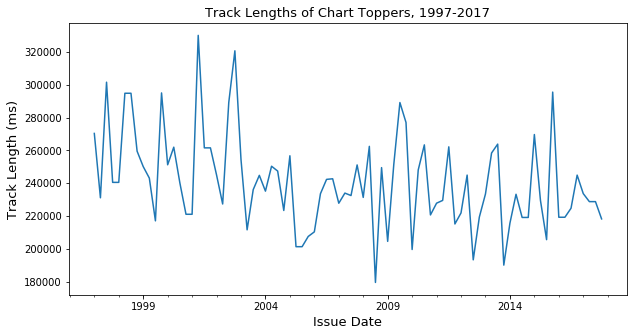

In [225]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel("Issue Date", fontsize = 13)
ax.set_ylabel("Track Length (ms)", fontsize = 13) 
ax.set_title("Track Lengths of Chart Toppers, 1997-2017", fontsize = 13) 

tracks["Track Length (ms)"].resample("Q").median().plot()
plt.show()

As we can see, there has been a slight downward trend from the early 2000s to now in length of the top track. We can further evaluate this be breaking the tracks dataset into segments by time. Let's break it into halves of 10 years:

In [226]:
first_half = tracks.loc["1997-01-01":"2007-12-31"]
second_half = tracks.loc["2008-01-01":"2017-12-31"]

In [227]:
median = first_half["Track Length (ms)"].median()
mean = first_half["Track Length (ms)"].mean()

print("1997-2007: Median", median, ", mean", mean)

1997-2007: Median 242373.0 , mean 248099.3031358885


In [228]:
median = second_half["Track Length (ms)"].median()
mean = second_half["Track Length (ms)"].mean()
print("2008-2017: Median", median, ", mean", mean)

2008-2017: Median 231400.0 , mean 235048.87234042553


It appears that the median and mean for the first ten years are over 10,000 milliseconds (10 seconds) higher than their 2008-2017 counterparts. The median for the second half is about 3 minutes, 51 seconds. 

The typical length of a chart-topping song appears to have decreased over the past two decades. Perhaps this is due to an icrease in tempo in the modern music scene? Let's look next at tempo, evaluated in beats per minute (BPM).

Now, why do a comparison to the mean and median instead of using a regression or a linear prediction trendline?
I think there may be a problem associated with the size and timed nature of the dataset, as the methods we discussed for adding a line to reflect a linear relationship yield Best Fit Lines like the one in red below: 

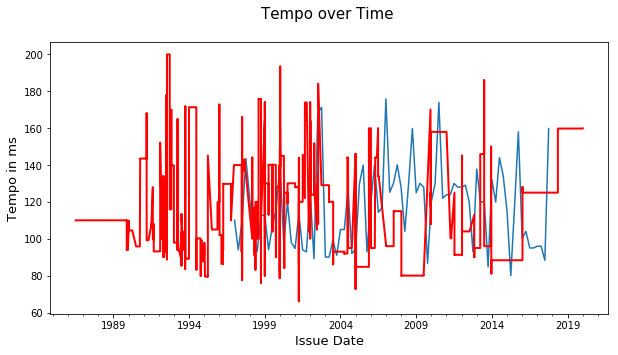

In [229]:
fig, ax = plt.subplots(figsize = (10,5))

ax.set_title("Tempo over Time \n", fontsize = 15)
ax.set_ylabel("Tempo in ms", fontsize = 13) 
ax.set_xlabel("Issue Date)", fontsize = 13)

tracks.resample("Q").median().tempo.plot()

# avg = tracks.tempo.mean()
# ax.axhline(y=avg, color='r', label='Average', linestyle='-', linewidth=2)

model = sm.formula.ols(formula="tracks['tempo'] ~ tracks.index", data=tracks).fit()

pred = model.predict(exog = tracks.index.sort_values())

ax.plot(tracks["tempo"].sort_values(), pred, 
        color = 'r', linewidth = 2.0, linestyle = "solid", label = "Best Fit Line")


plt.show()

This warrants further exploration, possibly into the datatypes that I've used for my different variables of interest, but for now, we return to a less crowded version of the graph. 

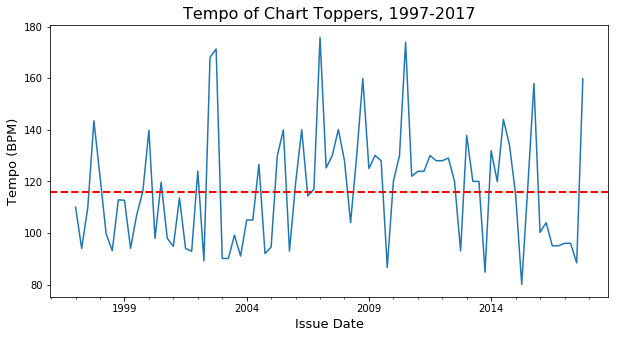

In [230]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel("Issue Date", fontsize = 13)
ax.set_ylabel("Tempo (BPM)", fontsize = 13) 
ax.set_title("Tempo of Chart Toppers, 1997-2017", fontsize = 16) 

tracks["tempo"].resample("Q").median().plot()

avg = tracks.tempo.median()
ax.axhline(y=avg, color='r', label='Average', linestyle='--', linewidth=2)


plt.show()

In [231]:
print("first half median: ", first_half.tempo.median(), '\nsecond half median: ', second_half.tempo.median(), '\nfirst half mean: ', first_half.tempo.mean(), '\nsecond half mean: ', second_half.tempo.mean())

first half median:  109.878 
second half median:  123.895 
first half mean:  116.09862891986047 
second half mean:  121.90607543520298


As we can see, the tempos two decades ago were around 10 BPM lower than the BPMs in the current decade. this is possibly correlated with the rise of new, faster genres in the early 2010s, and the popularity of slower songs in genres like R&B, which were more popular in the previous decade. 

However, slower genres are seeing a small resurgence in modern music, as we can see from the dip in tempo during the last two years in the graph. Other years in this decade likely had one or two major songs with slower tempos - for instance, 2013 saw a dip caused by Lorde's "Royals," clocking in at about 85 BPM, and 2015 saw early charts dominated by Wiz Khalifa and Charlie Puth's "See You Again," which reads at just above 80 BPM. 

One question we can ask is whether a dip in tempo relates to a rise in acousticness. If this were true, we would see a dip in acousticness in the years 2007-2013, where there is a period of elevated tempo in chart-topping tracks, and around 2016 to early 2017. 

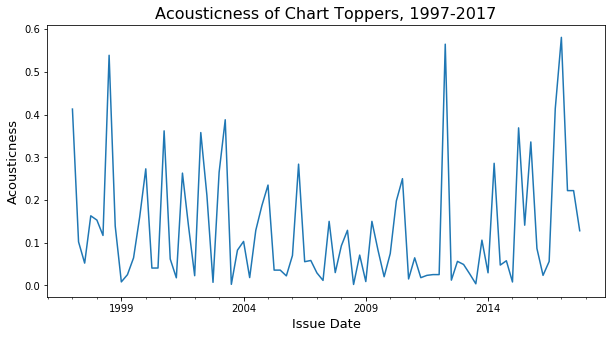

In [232]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel("Issue Date", fontsize = 13)

ax.set_ylabel("Acousticness", fontsize = 13) 
ax.set_title("Acousticness of Chart Toppers, 1997-2017", fontsize = 16) 

tracks.resample("Q").median().acousticness.plot()
plt.show()

As we suspected, There is a consistent dip in acousticness starting in the 2006-2007 range, and it carries through to 2013, save a spike in 2012 likely due to Gotye and Kimbra's "Somebody I Used To Know." However, 2016's dip in acousticness picks up before the median tempos do, so there appears to be a space for songs with both low and high acousticness in the popular acoustic space. 

Danceability appears to be a number that is somewhat subjective, depending on Spotify's proprietary calculations. As such, there isn't as much of a standard to determining the accuracy of these measurements, but for the sake of this exploration we'll consider these numbers valid. I do have some personal complaints, such as the fact that "Single Ladies" by Beyonce is less than 0.5 danceability, but I digress. 

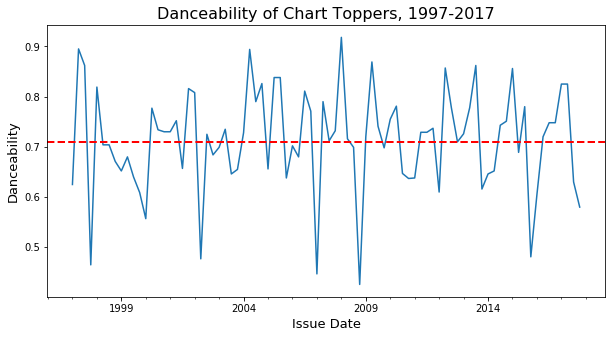

In [233]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel("Issue Date)", fontsize = 13)
ax.set_ylabel("Danceability", fontsize = 13) 
ax.set_title("Danceability of Chart Toppers, 1997-2017", fontsize = 16) 

tracks.resample("Q").median().danceability.plot()

avg = tracks.danceability.median()
ax.axhline(y=avg, color='r', label='Average', linestyle='--', linewidth=2)

plt.show()

This is one of the more consistent values across the decades, with few dips and many small peaks. It appears that most chart-topping songs are within the 0.6 to 0.9 range for danceability, with few exceptions. This makes sense, considering that songs with high dance potential often get played in many venues, sometimes repeatedly and in many different contexts. This may also reflect the strength of the pop genre on the Billboard Charts across the time period of interest. 

Danceability is likely related to energy, in that both consider beat strength and similar factors, but energy is once again a value that is calculated on the Spotify side, and not something standardized. This comes up a few times, and as this is Spotify data we're working with, it's perfectly reasonable. However, it's still important to note when a value is based on a proprietary calculation rather than something standard, as other rankings of energy or danceability might value them differently. 

On that note, let's take a look at energy and see if it's as consistent as danceability was. 

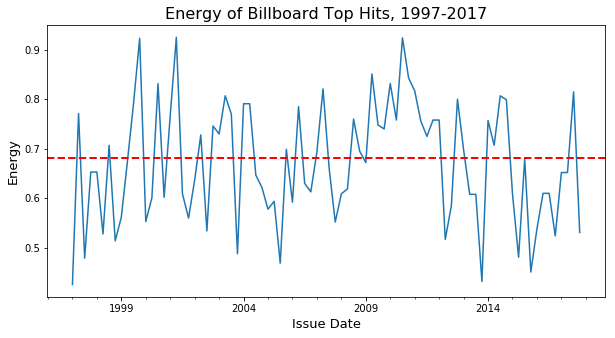

In [234]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel("Issue Date)", fontsize = 13)
ax.set_ylabel("Energy", fontsize = 13) 
ax.set_title("Energy of Billboard Top Hits, 1997-2017", fontsize = 16) 

tracks.resample("Q").median().energy.plot()

avg = tracks.energy.mean()
ax.axhline(y=avg, color='r', label='Average', linestyle='--', linewidth=2)

plt.show()

Energy, while remaning in the upper half of the 0-1 scale like danceability, has significantly more variation in its range. It appears that we're just coming out of another energy valley, but it remains to be seen if we'll hit a peak like the early 2000s or 2010s. Early parts of the decade are apparently periods of strong energy chart-toppers, with dips halfway through the decade, as seen around 2005 and 2015. 

Loudness, however, is a value that is based on a standard measurement system, being based on decibels (dB). Spotify genereally tends to keep its decibels somewhat low, possibly to cater to the majority of its users that use headphones for the platform. As a result, my hypothesis is that loudness values are also relative to other songs on the platform. However, it is still a standard, and can be evaluated with few concerns. 

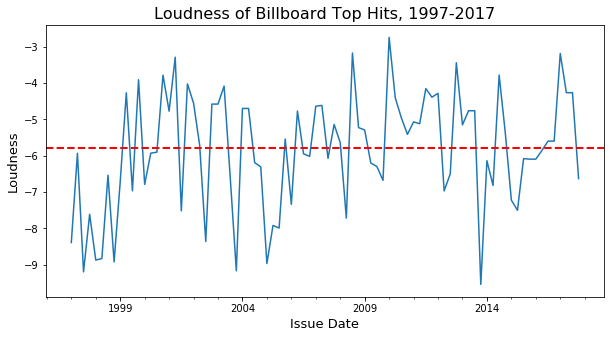

In [235]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel("Issue Date)", fontsize = 13)
ax.set_ylabel("Loudness", fontsize = 13) 
ax.set_title("Loudness of Billboard Top Hits, 1997-2017", fontsize = 16) 

tracks.resample("Q").median().loudness.plot()

avg = tracks.loudness.mean()
ax.axhline(y=avg, color='r', label='Average', linestyle='--', linewidth=2)

plt.show()

Keeping in mind that loudness is a reverse scale, where lower numbers represent louder sounds, we see something like an inverse relationship to energy. Energy's highest values are around places where loudness is valued -5 or higher. It does appear that the last decade has shown higher peaks, which means that modern softer songs seem generally softer than the softest songs in the previous decade. It also appears that we're currently on track to see a period of songs in the -5 or higher echelons of the scale, if we were to accept the trend of waves that we see here. 

As for instrumentalness, there hasn't been a strongly instrumental track that topped the Billboard Charts list in recent decades, and instrumentalness values are quite low across the board. This makes sense, as instrumentalness is simply a likelihood that a track is strongly or entirely instrumental. Values of 0.5 are supposed to be the threshold for entirely instrumental tracks, so Billboard hits, which are very prominently vocally focused, are going to have very low values for this. 

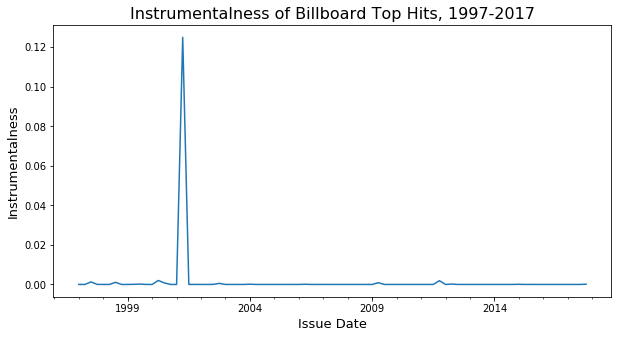

In [236]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel("Issue Date)", fontsize = 13)
ax.set_ylabel("Instrumentalness", fontsize = 13) 
ax.set_title("Instrumentalness of Billboard Top Hits, 1997-2017", fontsize = 16) 

tracks.resample("Q").median().instrumentalness.plot()



plt.show()

As we can see, we don't need a trendline to tell us that almost every song that has ranked at the top of the Billboard Hot 100 is very vocally focused. The one "spike" above 0.12 was Janet Jackson's "All For You," but it's not uncommon for songs to have an instrumental probability of 0.

I'll forgo looking at liveness for the same reason that instrumentalness was so brief - it's highly unlikely, and in fact confirmed, that a track at the top of the Billboard Hot 100 would have a large probability of being a live recording. Few tracks break the 0.1 mark on liveness, and the value breakdown is as follows:

In [237]:
mean = tracks.liveness.mean()
median = tracks.liveness.median()
min = tracks.liveness.min()
max = tracks.liveness.max()

print("mean: ", mean, 'median: ', median, "minimum: ", min, "maximum: ", max)

mean:  0.17143556370302496 median:  0.125 minimum:  0.0289 maximum:  0.671


It may seem like that 0.671 value warrants further exploration, but that value is attriputed to Katy Perry's "Last Friday Night," which is not a live performance track. I'm not sure why it has such a high live performance ranking, but the other values are so low that it doesn't seem to warrant further exploration. 

However, even though many songs rank quite low on speechiness, I am interested in speechiness resluts to see if there is a period of higher values in the early 2000s when R&B, Rap, and Hip-Hop artists were experiencing a prime in popularity. 

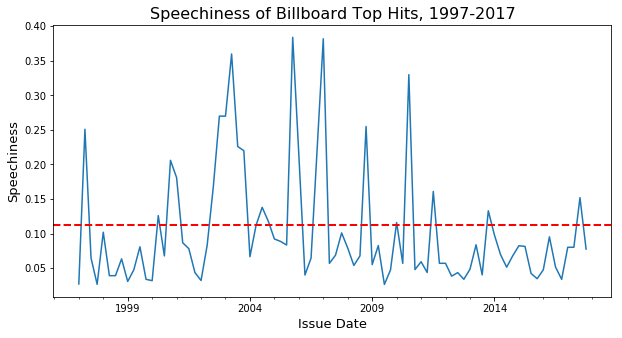

In [238]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel("Issue Date)", fontsize = 13)
ax.set_ylabel("Speechiness", fontsize = 13) 
ax.set_title("Speechiness of Billboard Top Hits, 1997-2017", fontsize = 16) 

tracks.resample("Q").median().speechiness.plot()

avg = tracks.speechiness.mean()
ax.axhline(y=avg, color='r', label='Average', linestyle='--', linewidth=2)

plt.show()

Sure enough, median speechiness values were much higher and more sustained in the early 2000s, with a period of sustained high values from 2002-2004 and some occasional peaks thereafter. Overall, however, speechiness remains low, as it represents a probability that a track is close to or entirely spoken word. 

The last feature to explore over time is valence. Valence is supposedly a measure of 'musical happiness' on a scale from 0-1. If I'll be honest, I can't imagine a period of time that is supposedly more 'musically happy' than another, but I imagine the late 00's and early '10s were a time for strong musical positivity. Valence is also a calculation made on Spotify's end. 



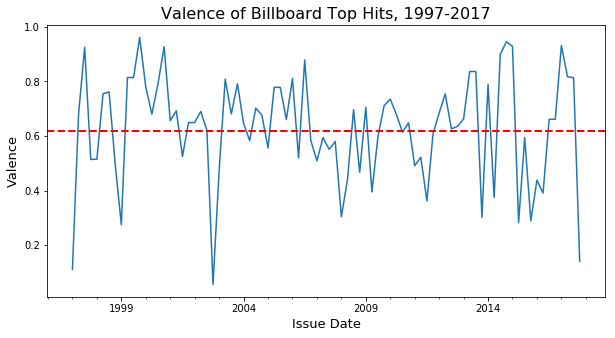

In [239]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel("Issue Date)", fontsize = 13)
ax.set_ylabel("Valence", fontsize = 13) 
ax.set_title("Valence of Billboard Top Hits, 1997-2017", fontsize = 16) 

tracks.resample("Q").median().valence.plot()

avg = tracks.valence.mean()
ax.axhline(y=avg, color='r', label='Average', linestyle='--', linewidth=2)

plt.show()

Valence appears to be a trend of shallower peaks and steeper valleys. It appears that overall, Billboard chart toppers have traditionally been more musically positive, which makes sense. People tend to gravitate towards things that elicit positive responses, and popular songs often capitalize on that desire. However, we do see that in recent years that valence has dipped for popular songs, and although the peaks are still quite high, the valleys are much lower than in previous years. 

Whether this is a sign of some sort of generational angst, I couldn't say, but it does appear that there has been more space on the top of the Billboard charts in the last few years for music that isn't musically bubbly and happy. 

One last consideration is for the key of the songs at the top of the charts. Spotify stores its keys in standard pitch class notation, where every key corresponds to a number. A legend is included here: 

0:"C", 1:"C#", 2: "D", 3: "D#", 4: "E", 5:"F", 6:"F#", 7:"G", 8:"G#", 9:"A", 10:"A#", 11:"B"

Let's first see if we can identify a trend over time for key of choice:

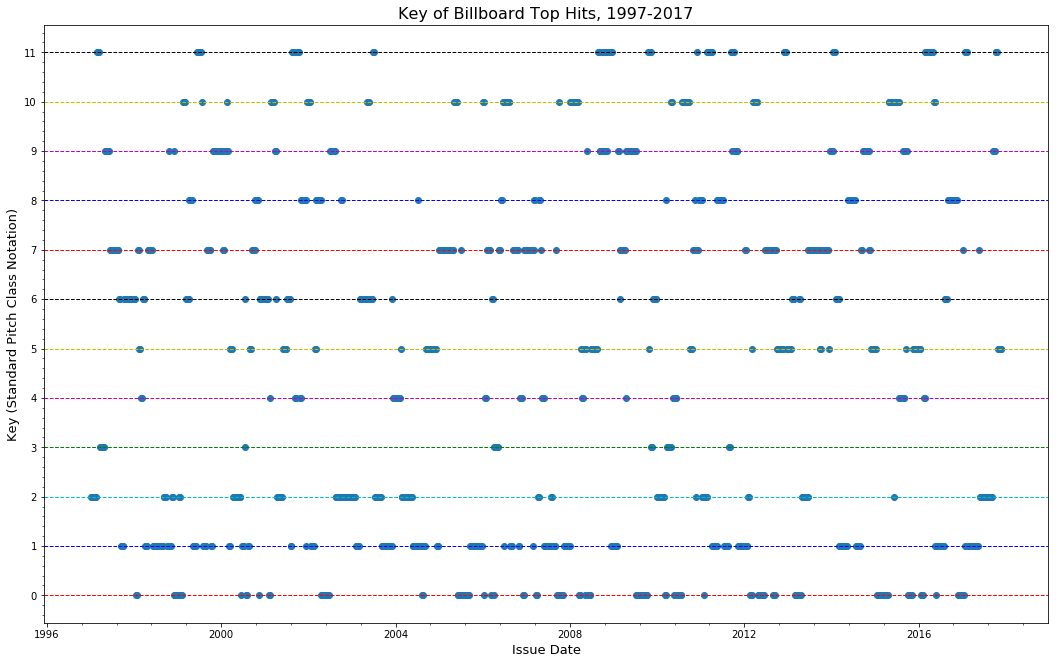

In [240]:
fig, ax = plt.subplots(figsize = (18,11))
ax.scatter(tracks.index,tracks['key'])
ax.set_xlabel("Issue Date", fontsize = 13)
ax.set_ylabel("Key (Standard Pitch Class Notation)", fontsize = 13) 
ax.set_title("Key of Billboard Top Hits, 1997-2017", fontsize = 16) 
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.minorticks_on()

# tracks.key.plot()

# avg = tracks.valence.mean()
ax.axhline(y=0, color='r', label='C', linestyle='--', linewidth=1)
ax.axhline(y=1, color='b', label='C#', linestyle='--', linewidth=1)
ax.axhline(y=2, color='c', label='D', linestyle='--', linewidth=1)
ax.axhline(y=3, color='g', label='D#', linestyle='--', linewidth=1)
ax.axhline(y=4, color='m', label='E', linestyle='--', linewidth=1)
ax.axhline(y=5, color='y', label='F', linestyle='--', linewidth=1)
ax.axhline(y=6, color='k', label='F#', linestyle='--', linewidth=1)
ax.axhline(y=7, color='r', label='G', linestyle='--', linewidth=1)
ax.axhline(y=8, color='b', label='G#', linestyle='--', linewidth=1)
ax.axhline(y=9, color='m', label='A', linestyle='--', linewidth=1)
ax.axhline(y=10, color='y', label='A#', linestyle='--', linewidth=1)
ax.axhline(y=11, color='k', label='B', linestyle='--', linewidth=1)

plt.show()

We elect to use a scatter plot here as opposed to a line graph because of the presence of discrete values in the dependent variable as opposed to continuous decimal values. 

If we look closely, we can see that the keys of B and C are seeing popularity in recent years, while D# and A# are not frequently used. In general, D# is used infrequently, while C and C# enjoy alternating periods of popularity in recent years. There are a number of short clusters of points, suggesting that there are times where multiple songs with the same key will top the chart at around the same time, or that a song with a certain key charted for a number of weeks. 

For instance, G is not an incredibly popular key for chart toppers, although it is not infrequently used. What is interesting is that it mostly appears in clusters, sp there will be several weeks of songs with the same key, or a sing in that key tends to chart at the top for long periods of time when it does chart. This is in contrast to songs in C, which chart often but do not chart for long periods of time or alongside other songs in C. 

C# appears to be the key that is both frequently at the top and charts for multiple weeks at a time, due to the frequency and density of clusters. 

For reference, here's the raw frequency counts of each key, with no time delineation. 

In [241]:
key_counts = pd.DataFrame(tracks["key"].value_counts())
key_counts

,key
1,197
0,138
7,130
2,121
5,88
9,78
6,76
10,73
8,65
11,64


This confirms what we see in the scatter plot, being that C# (1) and C (0) are extremely popular in general, and when G (7) is popular, it remains popular for many weeks. D (2) is surprisingly successful as well, although it appears that there are just a few hits in D that keep the key popular for extended periods.

# Summary

So what did we learn? If you want to write a chart-topping song in today's world:

* Stick to the key of C, C#, or G if you're feeling lucky. 
* Don't spend too much time talking.
* You might be able to get away with something dark or sad nowadays, but happier songs are more of a sure bet.
* An instrumental track just won't chart at the top.
* If you want to appeal to a modern audience, you should try to be a little softer than you expect, but there's still room for loudness.
* Energy might be back in fashion soon.
* Danceability of ~0.7 is always in fashion.
* Acousticness is slowly making its way back into fashion in a big way, potentially.
* A slower tempo isn't a bad thing, and might buy you a modern audience.
* Keep it short - A song under just 4 minutes is the modern sweet spot. We just don't have the attention span for songs near 5 minutes anymore.

Overall, in some ways our musical taste has changed a lot in the modern era. But at the same time, we still seem to like the happy, danceable, songs that we always have. Tools have improved so that our musical tastes can be wildly nuanced now, but not so much has changed that we lose the affinity for the good sounds we've always loved. 